In [2]:
import numpy as np
import cv2
from scipy import signal
from scipy import fftpack
from matplotlib import pyplot as plt

# Pipeline

In [13]:
def wiener_deconvolution(input_image: np.ndarray, target_image: np.ndarray, noise_level: float = 0.1, kernel_size: int = 15) -> np.ndarray:
    """
    Perform Wiener deconvolution to compute the deblurring kernel.

    Parameters:
    - input_image: np.ndarray - The input (blurry) image.
    - target_image: np.ndarray - The target (sharp) image.
    - noise_level: float - The noise level for regularization (default is 0.1).

    Returns:
    - np.ndarray - The computed deblurring kernel.
    """
   # Compute FFT of input and target images
    input_fft = fftpack.fft2(input_image)
    target_fft = fftpack.fft2(target_image)
    
    # Estimate the filter in frequency domain
    filter_fft = np.conj(input_fft) * target_fft / (np.abs(input_fft)**2 + noise_level**2)
    
    # Convert filter back to spatial domain
    kernel = np.real(fftpack.ifft2(filter_fft))
    
    # Normalize and truncate the kernel
    kernel = kernel / np.sum(kernel)
    kernel = fftpack.fftshift(kernel)
    center = kernel.shape[0] // 2
    kernel = kernel[center - kernel_size // 2:center + kernel_size // 2 + 1,
                    center - kernel_size // 2:center + kernel_size // 2 + 1]
    
    return kernel

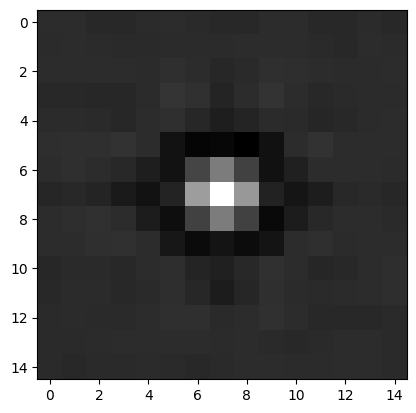

In [18]:
# Load images
input_image = cv2.imread('Prostate.jpg', cv2.IMREAD_GRAYSCALE)
target_image = cv2.imread('good.jpg', cv2.IMREAD_GRAYSCALE)
# Compute the kernel using Wiener deconvolution
kernel = wiener_deconvolution(input_image, target_image, noise_level=0.1, kernel_size=15)
plt.imshow(kernel, cmap = "gray")